Dataset: [E-commerce Customer Churn](https://www.kaggle.com/datasets/samuelsemaya/e-commerce-customer-churn)

In [34]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.9/207.9 kB 4.5 MB/s eta 0:00:00


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("/content/data_ecommerce_customer_churn.csv")
df.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0


In [51]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


**Codificación de variables categóricas**

In [39]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Tenure,float64
WarehouseToHome,float64
NumberOfDeviceRegistered,int64
PreferedOrderCat,object
SatisfactionScore,int64
MaritalStatus,object
NumberOfAddress,int64
Complain,int64
DaySinceLastOrder,float64
CashbackAmount,float64


In [31]:
categorical_columns = df.select_dtypes(object).columns
categorical_columns

Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder = "passthrough"
)
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object'))])

In [36]:
df_data = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
df_transformed = (
  pd.DataFrame(
      categorical_transformer.fit_transform(df_data),
      columns = categorical_transformer.get_feature_names_out(),
      index = df_data.index
  ).rename_columns(
      function = lambda x: x.removeprefix("onehotencoder__")
  ).rename_columns(
      function = lambda x: x.removeprefix("remainder__")
  )
)
df_transformed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,25.0,4.0,3.0,7.0,0.0,NaN,230.27,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,0.0
3937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0
3938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,6.0,5.0,3.0,3.0,1.0,2.0,156.60,0.0
3939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,NaN,4.0,3.0,10.0,1.0,0.0,124.37,1.0


In [40]:
from sklearn.tree import DecisionTreeClassifier

X = df_transformed.drop("Churn",axis=1)
y = df_transformed["Churn"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score

y_test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_acc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8782755705832629

In [45]:
clf.classes_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0., 1.])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.5, 0.8333333333333334, 'Tenure <= 1.5\ngini = 0.286\nsamples = 100.0%\nvalue = [0.827, 0.173]\nclass = No Churn'),
 Text(0.25, 0.5, 'Complain <= 0.5\ngini = 0.5\nsamples = 26.4%\nvalue = [0.508, 0.492]\nclass = No Churn'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.461\nsamples = 16.6%\nvalue = [0.641, 0.359]\nclass = No Churn'),
 Text(0.375, 0.16666666666666666, 'gini = 0.405\nsamples = 9.8%\nvalue = [0.283, 0.717]\nclass = Churn'),
 Text(0.75, 0.5, 'Complain <= 0.5\ngini = 0.109\nsamples = 73.6%\nvalue = [0.942, 0.058]\nclass = No Churn'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.059\nsamples = 55.1%\nvalue = [0.97, 0.03]\nclass = No Churn'),
 Text(0.875, 0.16666666666666666, 'gini = 0.242\nsamples = 18.5%\nvalue = [0.859, 0.141]\nclass = No Churn')]

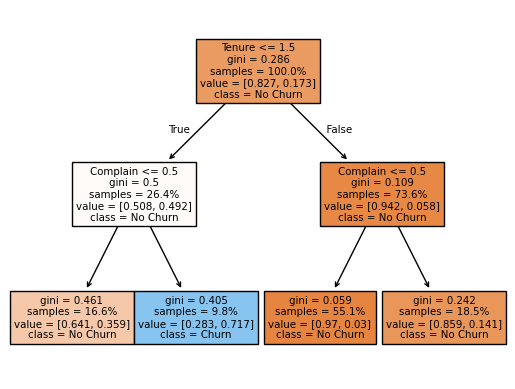

In [47]:
from sklearn import tree

tree.plot_tree(clf, feature_names=X.columns, class_names=["No Churn", "Churn"], proportion=True, filled=True)